## Check Password Strength Using ML algorithms

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rohit719/Password-Strength-Tester/master/data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
data.head() 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


#### Removing null values

In [4]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [5]:
data.dropna(inplace=True)

In [6]:
passwords_tuple=np.array(data)

In [7]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [8]:
import random
random.shuffle(passwords_tuple) #shuffling randomly for robustness


### extracting dependent features

In [9]:
y=[labels[1] for labels in passwords_tuple]

### extracting Independent features

In [11]:
X=[labels[0] for labels in passwords_tuple]

#### data visualization

In [16]:
import seaborn as sns

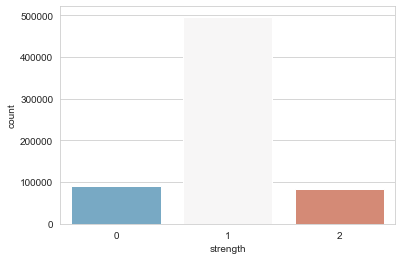

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [18]:
data.shape

(669639, 2)

#### creating tokenization function

In [19]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

#### APPLYING TF-IDF MODEL

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [22]:
X.shape

(669639, 126)

In [24]:
vectorizer.vocabulary_

{'k': 57,
 'z': 72,
 'd': 50,
 'e': 51,
 '5': 30,
 '7': 32,
 'i': 55,
 'n': 60,
 'o': 61,
 '3': 28,
 '4': 29,
 'm': 59,
 'g': 53,
 'y': 71,
 '1': 26,
 '2': 27,
 'v': 68,
 's': 65,
 'r': 64,
 '8': 33,
 'u': 67,
 '6': 31,
 'c': 49,
 'h': 54,
 'w': 69,
 'l': 58,
 'a': 47,
 'b': 48,
 'q': 63,
 'f': 52,
 't': 66,
 '0': 25,
 '9': 34,
 'p': 62,
 '@': 40,
 'j': 56,
 '-': 22,
 'x': 70,
 '.': 23,
 '&': 17,
 '?': 39,
 '>': 38,
 '<': 36,
 '!': 12,
 '_': 45,
 '%': 16,
 ' ': 11,
 '(': 18,
 ')': 19,
 '$': 15,
 '±': 85,
 '+': 21,
 '#': 14,
 '/': 24,
 '*': 20,
 '=': 37,
 '[': 41,
 '{': 73,
 '}': 75,
 ';': 35,
 '`': 46,
 'ú': 113,
 '"': 13,
 '~': 76,
 '^': 44,
 'þ': 117,
 'ó': 108,
 '\\': 42,
 '\x16': 5,
 'ò': 107,
 '·': 90,
 '\x1e': 10,
 ']': 43,
 'ô': 109,
 '\x1c': 9,
 '¿': 94,
 'ä': 99,
 '|': 74,
 '\x05': 0,
 '\x1b': 8,
 'ß': 95,
 'à': 96,
 'õ': 110,
 '¾': 93,
 'å': 100,
 'ÿ': 118,
 '³': 87,
 '‚': 121,
 'ð': 105,
 '´': 88,
 'â': 98,
 '\x10': 3,
 '\x17': 6,
 '°': 84,
 '÷': 111,
 '\x19': 7,
 'µ': 89,
 

In [25]:
X

<669639x126 sparse matrix of type '<class 'numpy.float64'>'
	with 5643316 stored elements in Compressed Sparse Row format>

In [26]:
data.iloc[0,0]

'kzde5577'

In [27]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591154
5,0.566901
z,0.337050
k,0.291855
d,0.285430
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


In [28]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


In [31]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print(log_class.score(X_test,y_test))

0.8125112000477869


In [41]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8191938952272863


In [39]:
X_predict=np.array(["%@846sdfg"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')

strong password


## Xgboost Algorithm

In [36]:
! pip install xgboost

In [40]:
import xgboost as xgb

In [42]:
xgb_classifier=xgb.XGBClassifier()

In [43]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgb_classifier.score(X_test,y_test)

0.9858132728032973

In [46]:
X_predict=np.array(['@rtdryu123$'])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')

strong password


## MultinomialNB

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()

In [48]:
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
nb_classifier.score(X_test,y_test)

0.7435114389821397

In [51]:
X_predict=np.array(['rtyu123$'])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_classifier.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')


medium password
